# 5. Network theory: concepts and methods

In this class, we will introduce networks and the most common `networkx` Python library used to analyse them, we will move on to look into geographically embedded networks, such as street networks and the `osmnx` library with its functionalities to learn about the range of analytic capabilities it offers for studying spatial networks. 

* The `networkx` library is used to access, manipulate, analyse, and model, graph data.
* The most basic class functionality, `nx.Graph()`, allows us to initialize an empty graph, to which we can add nodes and edges
* The integers 1, 2, 3, and 4 can be given as nodes, using the `add_nodes_from` method, passing the list [1, 2, 3, 4] as an argument to it.
* The `.nodes()` method can be used to access the nodes in the graph.
* Similarly, the `.add_edges()` and `.edges()` are used to add and see the edges in the graph.
* Edges between nodes are represented as a list of tuples, where each tuple shows the nodes comprising that edge.

In [1]:
#Importing the necessary libraries for this lab:
                                                                      #------------------------------------------------
import networkx as nx                                                 #---> Library for network analysis
import matplotlib.pyplot as plt                                       #---> Library for creating plots
import collections                                                    #---> Library for operating with dictionaries
import numpy as np, pandas as pd, geopandas as gpd                    #---> Library for efficiently operating with arrays/matrices/vectors
from pylab import rcParams                                            #---> Library for set the attributes of the figures
import re                                                             #---> Library for regular operations with string
from operator import itemgetter                                       #---> Library for iterable obejcts
import seaborn as sns                                                 #---> Library for creating plots
import matplotlib.colors as mcolors                                   #---> Library for setting colors of the plots
import powerlaw                                                       #---> Library for analysing heavy tailed distributions
from itertools import combinations
import matplotlib.patches as mpatches

from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon, MultiPolygon
                                                                      #Magic functions (%) for setting up the matplotlib and increase the resolution of the plots:
import osmnx as ox
%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.1.1'

In [2]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.nodes()

NodeView((1, 2, 3, 4))

In [3]:
G.add_edge(1, 2)
G.add_edges_from([(1, 3), (3, 4)])
G.edges()

EdgeView([(1, 2), (1, 3), (3, 4)])

Plotting a graph with `matplotlib` is easy!

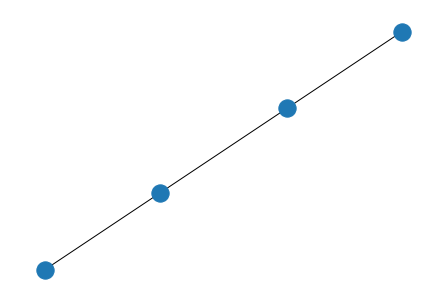

In [4]:
import matplotlib.pyplot as plt

nx.draw(G)
plt.show()

Let's learn how to load a graph from a simple text file:

In [5]:
with open('../data/Network theory/ia-enron.edges.txt') as f:
    contents = f.read()
    print(contents[:50])

48	13
67	13
67	13
75	147
67	48
67	13
67	13
48	50
4


In [6]:
g = nx.read_edgelist('../data/Network theory/ia-enron.edges.txt', create_using=nx.Graph(), nodetype=int)
g.nodes()

NodeView((48, 13, 67, 75, 147, 50, 38, 49, 107, 54, 27, 96, 151, 66, 129, 136, 142, 137, 76, 44, 122, 139, 69, 114, 81, 125, 61, 39, 58, 32, 128, 91, 59, 19, 20, 63, 2, 141, 89, 57, 25, 7, 4, 16, 29, 73, 118, 21, 110, 64, 132, 77, 45, 148, 150, 101, 18, 68, 62, 60, 88, 40, 123, 127, 111, 104, 102, 26, 28, 78, 119, 11, 33, 31, 17, 146, 53, 52, 37, 90, 145, 42, 47, 70, 1, 3, 34, 108, 100, 140, 121, 113, 56, 9, 130, 124, 35, 135, 74, 5, 149, 15, 115, 138, 97, 93, 87, 133, 86, 85, 22, 131, 84, 71, 36, 55, 72, 103, 117, 134, 94, 126, 98, 143, 80, 105, 95, 109, 10, 120, 41, 106, 8, 83, 92, 82, 43, 6, 24, 112, 65, 14, 79, 51, 23, 30, 12, 46, 144, 99))

Let's try plotting the network:

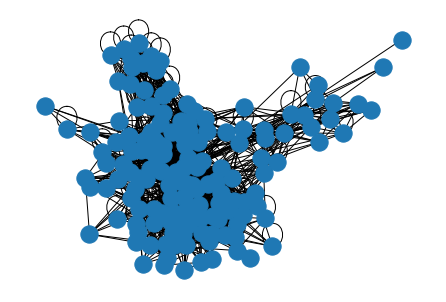

In [7]:
nx.draw(g)
plt.show()

### Adjacency matrices

An important and common technique for creating `networkx` network objects is building them from adjacency matrices. Let's define a function that creates a square matrix randomly populated with ones and zeros that we will use as a synthetic adjacency matrix for a random network.

In [8]:
def random_array(shape, ones):
    size = np.product(shape)
    board = np.zeros(size, dtype=int)
    i = np.random.choice(np.arange(size), ones)
    board[i] = 1
    return board.reshape(shape)

adj_mat = random_array((8,8), 16)
adj_mat

array([[0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

Let's find the rows and columns of our edges from the adjacency matrix we just created:

In [9]:
rows, cols = np.where(adj_mat == 1)
rows, cols

(array([0, 0, 0, 1, 1, 2, 2, 2, 3, 5, 5, 5, 5, 6, 6, 7], dtype=int64),
 array([3, 4, 5, 0, 3, 2, 5, 6, 1, 2, 4, 5, 6, 1, 4, 7], dtype=int64))

Now, let's create tuple pairs denoting the edges in our network.

In [10]:
edges = tuple(zip(rows.tolist(), cols.tolist()))
edges

((0, 3),
 (0, 4),
 (0, 5),
 (1, 0),
 (1, 3),
 (2, 2),
 (2, 5),
 (2, 6),
 (3, 1),
 (5, 2),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 4),
 (7, 7))

Finally, let's initialise an empty network, add edges to it, and plot the resulting network:

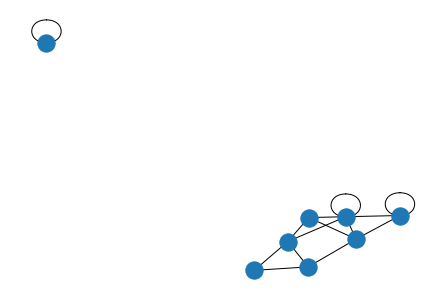

In [11]:
gr = nx.Graph()
gr.add_edges_from(edges)
nx.draw(gr)

However, there is a simpler way for creating a `networkx` network object from a numpy adjacency array. Let's create it using the `from_numpy_array` method and check if the thus created graph is identical to the graph we had created using the method of adding edges to an empty graph.

In [12]:
gr2 = nx.from_numpy_array(adj_mat)
print(gr==gr2)

False


#### False?! What's going on?

Checking conventional equality of objects with `==` returned False for the simple reason that Python went on to check if the nodes and edges of both graphs are stored identically in memory. Simply printing the list of nodes for both networks reveals the caveat:

In [13]:
print(gr.nodes())
print(gr2.nodes())

[0, 3, 4, 5, 1, 2, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]


As we can see, the method of adding edges has resulted in a random node order in the first graph. What we need to check for instead is whether the two graphs are **topologically** identical, or, if they are isomorphic:

In [14]:
nx.is_isomorphic(gr, gr2)

True

### Moving on to advanced network analysis and visualisation 

We noticed the self-loops in the gaph we constructed from the data we loaded. So let's do something about it!

In [15]:
A = nx.adjacency_matrix(g)
print(A)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 8)	1
  (0, 10)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 27)	1
  (0, 31)	1
  (0, 39)	1
  (0, 43)	1
  (0, 50)	1
  (0, 51)	1
  (0, 54)	1
  (0, 57)	1
  (0, 60)	1
  (0, 61)	1
  :	:
  (146, 26)	1
  (146, 30)	1
  (146, 39)	1
  (146, 40)	1
  (146, 41)	1
  (146, 67)	1
  (146, 71)	1
  (146, 72)	1
  (147, 8)	1
  (147, 9)	1
  (147, 12)	1
  (147, 20)	1
  (147, 22)	1
  (147, 45)	1
  (147, 54)	1
  (147, 62)	1
  (147, 69)	1
  (147, 80)	1
  (147, 143)	1
  (147, 144)	1
  (148, 97)	1
  (149, 54)	1
  (149, 97)	1
  (149, 111)	1
  (149, 119)	1


In [16]:
A = A.todense()
print(A)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Let's get rid of the self-loops by setting the diagonal to zeros:

In [17]:
np.fill_diagonal(A, 0)
print(A)

[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


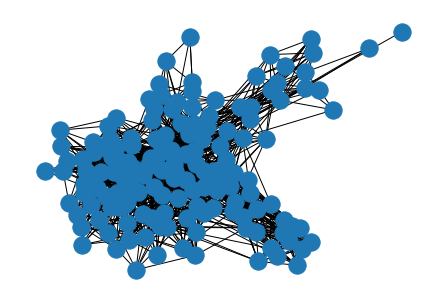

In [18]:
gr_ = nx.from_numpy_array(A)
nx.draw(gr_)
plt.show()

As we have seen so far, the default settings offer poor visual qualities. Hence, let's see how we can plot the network data in a meaningful way. For demonstration purposes, we will focus on plotting ego graphs extending from the node id with up to interaction distance _r_, with colors of decreasing gradient for a nice visual output.

In [19]:
#set random seed for reproducibility
random_seed = 10
#choose nice palette for gradient
colors = sns.color_palette("YlOrRd_r").as_hex()
colors

['#c20325', '#ea2920', '#fc6832', '#fea245', '#fece6a', '#ffea9b']

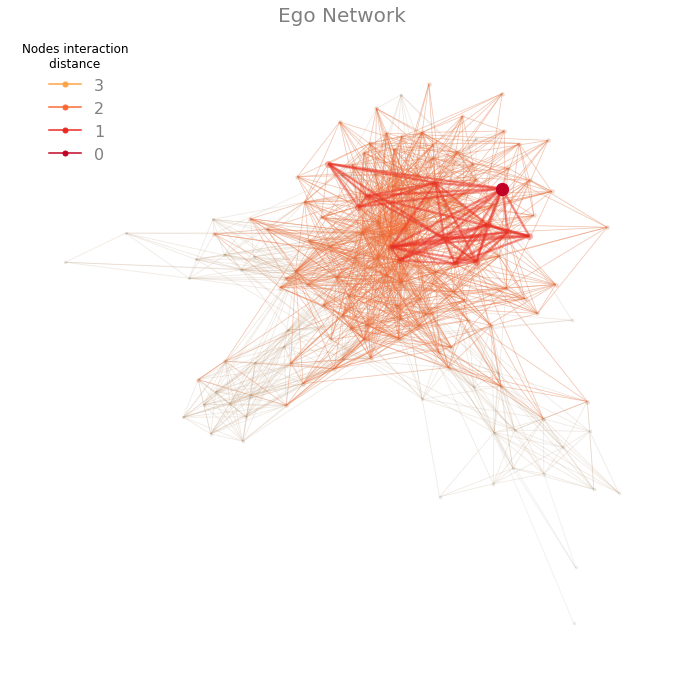

In [20]:
from matplotlib.lines import Line2D
def draw_ego(network, layout, node_id, r):
    ''' 
        This function takes as input the network, the plotting layout, the node id and the interaction distance,
        and plots ego graphs extending from the node id with up to interaction distance r, with colors of decreasing 
        gradient for a nice visual output.
        
    '''
    #choose a nice color palette
    colors = sns.color_palette("YlOrRd_r").as_hex()
    
    # specify layout
    pos = layout
    
    #start plotting
    plt.figure(figsize=(12,12)) #specify plot size
    
    #plot the network in the background 
    nx.draw_networkx_nodes(network, pos, node_size=5, label=False, alpha=0.1)
    nx.draw_networkx_edges(network, pos, edge_color='grey', alpha=0.1)
    
    # loop over the distances in reverse order so that the smaller distances get plotted on top
    for i in reversed(range(r)):
        hub_ego = nx.ego_graph(network, node_id, radius=i, distance=None)
        nodes = nx.draw_networkx_nodes(hub_ego, pos, node_color=colors[i], node_size=150/(i+1)**2, alpha=1/(i+1)**2)
        nx.draw_networkx_edges(hub_ego, pos, edge_color=colors[i], alpha = 1/(i+1)**1.2, width = 20/(i+1)**3)
   
    
    # custom legends
    legend_elements = [Line2D([0], [0], marker='o', color=colors[i], label=str(i),
                              markerfacecolor=colors[i], markersize=5) for i in reversed(range(r))
                      ]
    legend = plt.legend(handles=legend_elements, loc='upper left', prop={'size': 16, 'weight':'light'}, \
               labelcolor='grey', frameon=False)
    legend.set_title('Nodes interaction \n       distance', prop={'size': 12, 'weight':'light'})
    
    plt.axis(False)
    plt.title("Ego Network", color='grey', size=20)
    plt.show()
draw_ego(gr_, nx.spring_layout(gr_, seed=random_seed), 146, 4)

A common network analytic method you will come across in your projects is shortest path analysis. Shortest path analysis is used in many areas of human activities: from Google Maps routing to Airport scheduling. Let's have a brief overview of how it works in Python, how we can formulate specific problems with it, and how to meaningfully visualise the results.

For demonstration purposes, let's find the longest shortest path in the graph, plot it, and print the path origin node id, destination node id, and the remaining node ids in the path.

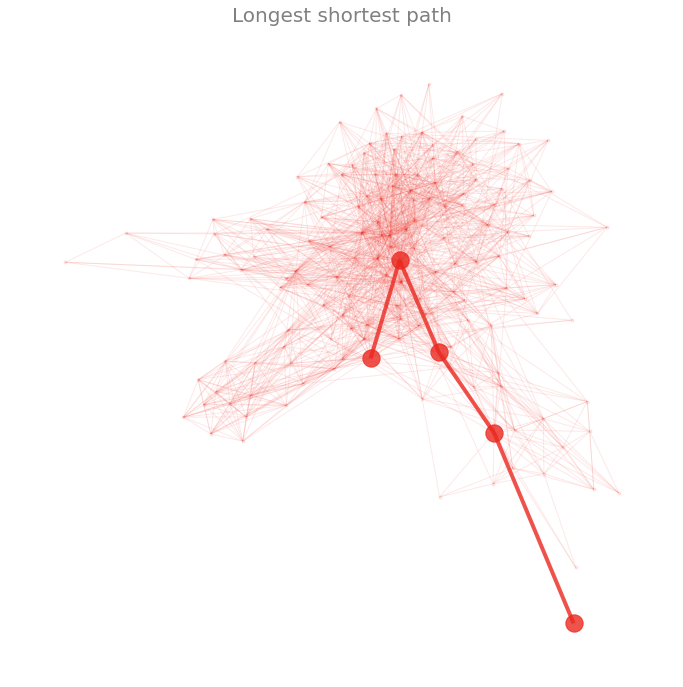

source node:  12
target node:  148
Longest shortest path node ids:  [12, 8, 50, 97, 148]


In [21]:
def plot_long_shortest(graph):
    
    ''' 
        This function takes as input a graph G, computes the longest shortest path in the graph, plots it, and prints
        the path source id, target id, and the remaining node ids in the path.
        
    '''
    
    # choose a nice color palette
    colors = sns.color_palette("YlOrRd_r").as_hex()

    # set up position with random seed
    pos = nx.spring_layout(graph, seed  = random_seed)
    
    #start plotting
    plt.figure(figsize=(12,12))
    
    #plot the background edges and nodes
    nx.draw_networkx_nodes(graph, pos, node_size=8,node_color=colors[1], label=False, alpha=0.1)
    nx.draw_networkx_edges(graph, pos, edge_color=colors[1], alpha=0.1)
    
    #initialise a dictionary where we will store key value pairs of the form {(source, target):path length}
    path_length_dict = {}
    
    #loop over all pairs of nodes, compute the shortest paths, and store them in the dictionary
    for source, target in combinations(graph.nodes(), 2):
        l = nx.shortest_path_length(graph,source,target)
        path_length_dict[(source, target)] = l
        
    #from the dictionary, find the key with the maximum value (i.e. with the longest shortest path)
    source, target = max(path_length_dict, key=path_length_dict.get)
    
    #plot shortest path
    path = nx.shortest_path(graph,source=source,target=target)
    path_edges = list(zip(path,path[1:]))
    
    nx.draw_networkx_nodes(graph,pos,nodelist=path,node_color=colors[1], alpha=0.8)
    nx.draw_networkx_edges(graph,pos,edgelist=path_edges,edge_color=colors[1],width=4, alpha=0.8)
    
    plt.axis(False)
    plt.title("Longest shortest path", color='grey', size=20)
    plt.show()
    
    print('source node: ', path[0])
    print('target node: ', path[-1])
    print('Longest shortest path node ids: ', path)
    
plot_long_shortest(gr_)

### Spatial Networks with `osmnx`

As we have already discussed, `osmnx` is a Python package for interacting with the OpenStreetMap API to access, download, and analyse OSM data. Below, we will build on our `networkx` skills we acquired above to work with the Vanadzor street network.
This is will be a brief introductory overview of `osmnx` functionality. For a more complete coverage, refer to the developer's [github](https://github.com/gboeing/osmnx-examples) for examples.

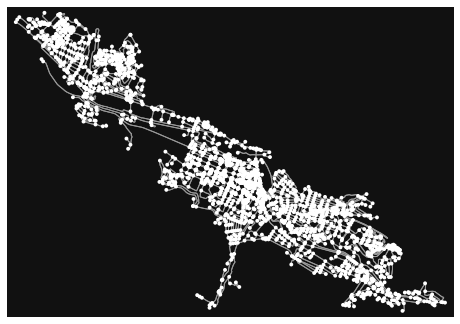

In [22]:
# download/model a street network for Vanadzor and visualize it
G = ox.graph_from_place("Vanadzor, Armenia", network_type="walk")
fig, ax = ox.plot_graph(G)

The OSMnx library geocodes the query "Vanadzor, Armenia" to retrieve the place boundaries of that city from the [Nominatim API](https://nominatim.org/release-docs/latest/api/Overview/), retrieves the drivable street network data within those boundaries from the Overpass API, constructs a graph model, then simplifies/corrects its topology such that nodes represent intersections and dead-ends and edges represent the street segments linking them. All of this is discussed in detail in the documentation and these examples.

OSMnx models all networks as NetworkX MultiDiGraph objects. You can convert to:

undirected MultiGraphs
DiGraphs without (possible) parallel edges
GeoPandas node/edge GeoDataFrames

In [23]:
# convert your MultiDiGraph to an undirected MultiGraph
M = ox.utils_graph.get_undirected(G)

# convert your MultiDiGraph to a DiGraph without parallel edges
D = ox.utils_graph.get_digraph(G)

In [24]:
# we can convert our graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes.head()

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
208864303,40.789711,44.520041,3,NaN,NaN,POINT (44.52004 40.78971)
208864309,40.786617,44.528207,3,NaN,NaN,POINT (44.52821 40.78662)
412354174,40.816935,44.495169,5,3,motorway_junction,POINT (44.49517 40.81694)
412354187,40.807842,44.496897,3,NaN,NaN,POINT (44.49690 40.80784)
412354190,40.803755,44.497379,3,NaN,NaN,POINT (44.49738 40.80376)


In [25]:
gdf_edges.head()

osmid  ref              name      highway  \
u         v          key                                                  
208864303 1876621394 0    419830747  Մ-8  Երեւանյան խճուղի        trunk   
          7424252319 0    419830747  Մ-8  Երեւանյան խճուղի        trunk   
          5500309947 0    190112331  NaN     Ամիրյան փողոց  residential   
208864309 1876582807 0    419830747  Մ-8  Երեւանյան խճուղի        trunk   
          2017297601 0    419830747  Մ-8  Երեւանյան խճուղի        trunk   

                         maxspeed  oneway   length  \
u         v          key                             
208864303 1876621394 0         50   False   46.950   
          7424252319 0         50   False   69.234   
          5500309947 0         60   False   43.300   
208864309 1876582807 0         50   False  256.840   
          2017297601 0         50   False  100.786   

                                                                   geometry  \
u         v          key                                                      
208864303 1876621394 0    LINESTRING (44.52004 40.78971, 44.52055 40.78954)   
          7424252319 0    LINESTRING (44.52004 40.78971, 44.51930 40.78998)   
          5500309947 0    LINESTRING (44.52004 40.78971, 44.51993 40.789...   
208864309 1876582807 0    LINESTRING (44.52821 40.78662, 44.53061 40.78520)   
          2017297601 0    LINESTRING (44.52821 40.78662, 44.52724 40.78715)   

                         lanes bridge junction tunnel access width service  
u         v          key                                                    
208864303 1876621394 0     NaN    NaN      NaN    NaN    NaN   NaN     NaN  
          7424252319 0     NaN    NaN      NaN    NaN    NaN   NaN     NaN  
          5500309947 0     NaN    NaN      NaN    NaN    NaN   NaN     NaN  
208864309 1876582807 0     NaN    NaN      NaN    NaN    NaN   NaN     NaN  
          2017297601 0     NaN    NaN      NaN    NaN    NaN   NaN     NaN

You can create a graph from node/edge GeoDataFrames, as long as gdf_nodes is indexed by osmid and gdf_edges is multi-indexed by u, v, key (following normal MultiDiGraph structure). This allows you to load graph node/edge shapefiles or GeoPackage layers as GeoDataFrames then convert to a MultiDiGraph for graph analytics.

In [26]:
# convert node/edge GeoPandas GeoDataFrames to a NetworkX MultiDiGraph
G2 = ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=G.graph)

### Simple street network statistics


In [27]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

36539054.10692741

`Osmnx` allows to quickly obtain some basic network statistics:

In [28]:
# show some basic stats about the network
ox.stats.basic_stats(G_proj, area=graph_area_m)

{'n': 2317,
 'm': 6498,
 'k_avg': 5.60897712559344,
 'edge_length_total': 631977.8959999991,
 'edge_length_avg': 97.25729393659574,
 'streets_per_node_avg': 2.8329736728528268,
 'streets_per_node_counts': {0: 0,
  1: 387,
  2: 0,
  3: 1550,
  4: 375,
  5: 4,
  6: 0,
  7: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.16702632714717308,
  2: 0.0,
  3: 0.6689684937419076,
  4: 0.16184721622788087,
  5: 0.0017263703064307294,
  6: 0.0,
  7: 0.00043159257660768235},
 'intersection_count': 1930,
 'street_length_total': 315988.9480000001,
 'street_segment_count': 3249,
 'street_length_avg': 97.2572939365959,
 'circuity_avg': 1.0812232754518427,
 'self_loop_proportion': 0.0021545090797168358,
 'node_density_km': 63.411603190918996,
 'intersection_density_km': 52.820196011425836,
 'edge_density_km': 17295.956653683133,
 'street_density_km': 8647.978326841581}

### Street Network centralities

### Betweenness centrality

In graph theory, **betweenness centrality** is a measure of centrality importance in a network based on shortest paths. For every pair of nodes in a connected network, there exists at least one shortest path between the nodes such that either the number of edges that the path passes through (for unweighted networks) or the sum of the weights of the edges (for weighted networks) is minimized. The betweenness centrality for each node is the number of these shortest paths that pass through the vertex. The more shortest paths pass through a given node, the more the node can be said to be important in the network.

This centrality measure is often used in street network analysis, transportation studies, as it is assumed that people tend to take the shortest path to a destination, and hence, the more shortest paths paass through a street junction (or street, in case of edge betweenness centrality), the more popular and attractive the street junction (or street) can be expected to be.

he betweenness centrality of a node $v$ is given by the expression:

$$
g(v)=\sum_{s \neq v \neq t} \frac{\sigma_{s t}(v)}{\sigma_{s t}}
$$

where $\sigma _{st}$ is the total number of shortest paths from node $s$ to node $t$ and $\sigma _{st}(v)$ is the number of those paths that pass through $v$.

In [29]:
# calculate betweenness with a directed graph of G_proj (ie, no parallel edges)
bc = nx.betweenness_centrality(ox.get_digraph(G_proj), weight="length")
max_node_bc, max_bc = max(bc.items(), key=lambda x: x[1])
max_node_bc, max_bc

(1876582889, 0.3255393040059386)

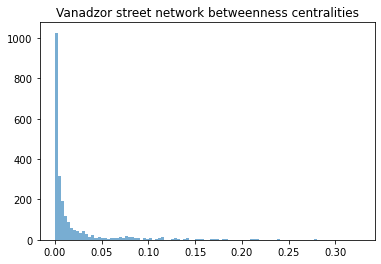

In [30]:
# let's plot a quick histogram of the centrality values
plt.hist(bc.values(), bins=100, alpha=0.6)
plt.title('Vanadzor street network betweenness centralities')
plt.show()

We see that in Vanadzor, the street junction with the highest betweenness centrality has ~32% of all shortest paths running through it. Let's visualise it:

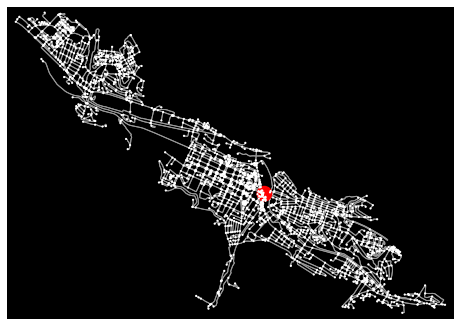

In [31]:
# below we create a list for specifying the node colors - the node with maximum centrality in red, the rest in white
# and, accordingly, a list for node sizes - the node with maximum centrality bigger than the rest
node_colors_bc = ["r" if node == max_node_bc else "w" for node in G_proj.nodes]
node_sizes_bc  = [250 if node == max_node_bc else 5 for node in G_proj.nodes]
fig, ax = ox.plot_graph(G_proj, node_size=node_sizes_bc, node_color=node_colors_bc, node_zorder=2, bgcolor="k")

Now, let's plot the betweenness centrality values for all street junctions in the Vanadzor street network:

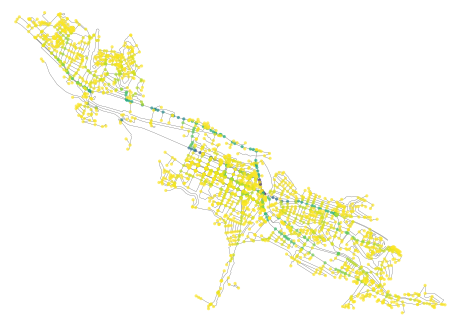

In [32]:
# add the betweenness centrality values as new node attributes, then plot
nx.set_node_attributes(G_proj, bc, "bc")
node_colors_bc = ox.plot.get_node_colors_by_attr(G_proj, "bc", cmap="viridis_r")
fig, ax = ox.plot_graph(
    G_proj,
    node_color=node_colors_bc,
    node_size=10,
    node_zorder=2,
    edge_linewidth=0.2,
    edge_color="grey",
    bgcolor="w",
    node_alpha=.7
)

### Closeness centrality

The **closeness centrality** of a node $u$ is the reciprocal of the sum of the shortest path distances from $u$ to all $n-1$ other nodes. Since the sum of distances depends on the number of nodes in the network, closeness is normalized by the sum of minimum possible distances $n-1$.

$$
C(u)=\frac{n-1}{\sum_{v=1}^{n-1} d(v, u)}
$$

where $d(v, u)$ is the shortest-path distance between $v$ and $u$, and $n$ is the number of nodes in the network. Higher closeness values indicate higher centrality. 

In [33]:
# calculate closeness centralities with a directed graph of G_proj (ie, no parallel edges)
clc = nx.closeness_centrality(ox.get_digraph(G_proj), distance="length")
max_node_clc, max_clc = max(clc.items(), key=lambda x: x[1])
max_node_clc, max_clc

(1954249281, 0.000331750478175127)

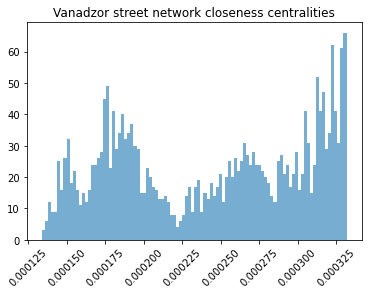

In [34]:
# let's plot a quick histogram of the centrality values
plt.hist(clc.values(), bins=100, alpha=0.6)
plt.xticks(rotation=45)
plt.title('Vanadzor street network closeness centralities')
plt.show()

Let's plot the results for the node with the maximum closeness centrality in Vanadzor:

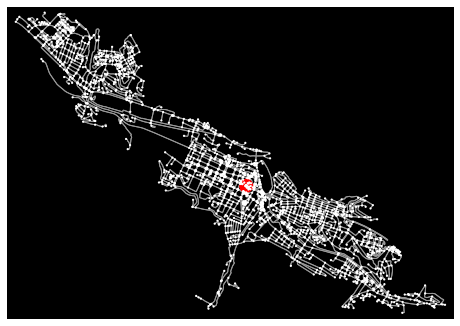

In [35]:
# below we create a list for specifying the node colors - the node with maximum centrality in red, the rest in white
# and, accordingly, a list for node sizes - the node with maximum centrality bigger than the rest
node_colors_clc = ["r" if node == max_node_clc else "w" for node in G_proj.nodes]
node_sizes_clc  = [200 if node == max_node_clc else 5 for node in G_proj.nodes]
fig, ax = ox.plot_graph(G_proj, node_size=node_sizes_clc, node_color=node_colors_clc, node_zorder=2, bgcolor="k")

Now, let's plot the closeness centrality values for all street junctions in the Vanadzor street network:

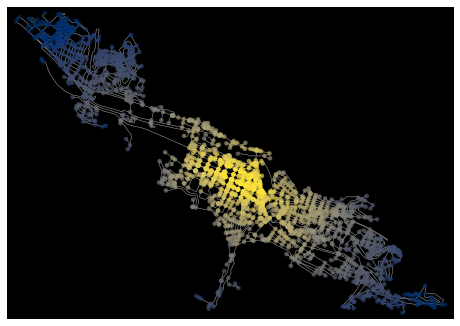

In [36]:
# add the closeness centrality values as new node attributes, then plot
nx.set_node_attributes(G_proj, clc, "clc")
node_colors_clc = ox.plot.get_node_colors_by_attr(G_proj, "clc", cmap="cividis")
fig, ax = ox.plot_graph(
    G_proj,
    node_color=node_colors_clc,
    node_size=20,
    node_zorder=2,
    edge_linewidth=0.4,
    edge_color="grey",
    bgcolor="k",
    node_alpha=.7
)

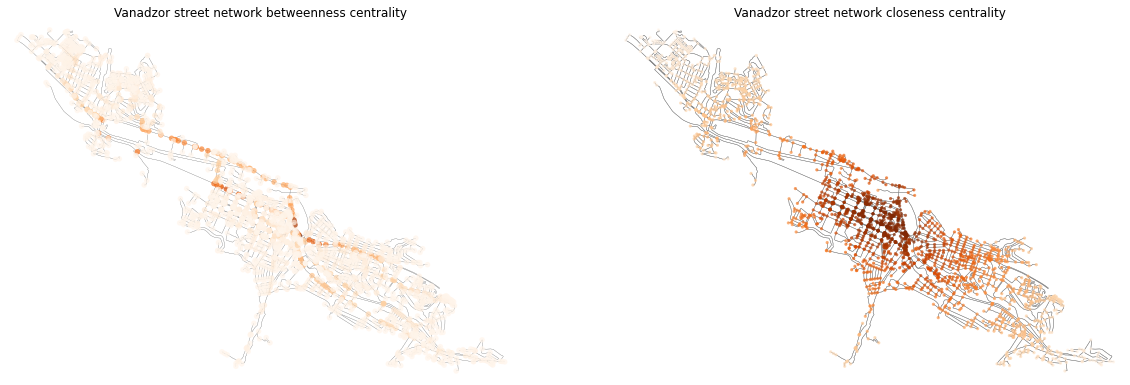

In [37]:
node_colors_bc = ox.plot.get_node_colors_by_attr(G_proj, "bc", cmap="Oranges")
node_colors_clc = ox.plot.get_node_colors_by_attr(G_proj, "clc", cmap="Oranges")

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,12))  # 1 row, 2 columns

ox.plot_graph(
    G_proj,
    show=False, close=False,
    node_color=node_colors_bc,
    node_size=30,
    node_zorder=2,
    edge_linewidth=0.2,
    edge_color="grey",
    bgcolor="k",
    node_alpha=.7,
    ax=ax1
)
ax1.set(title="Vanadzor street network betweenness centrality")

ox.plot_graph(
    G_proj,
    show=False, close=False,
    node_color=node_colors_clc,
    node_size=10,
    node_zorder=2,
    edge_linewidth=0.4,
    edge_color="grey",
    bgcolor="k",
    node_alpha=.7,
    ax=ax2
)

ax2.set(title="Vanadzor street network closeness centrality")

# ax1.axis('off')
# ax2.axis('off')
#plt.tight_layout()
plt.show()

### PageRank centrality

As we have already discussed, network centrality measures are used to identify the relative importance of nodes in a network. A particularly popular centrality metric is the **PageRank centrality** used by Google to rank its webpages. The idea behind it is very simple: a node is important if other important nodes are pointing at it. As we can notice it implies a self-referential system and mathematically satisfies the following equation:

$
x_{i}=\alpha \sum_{j} a_{j i} \frac{x_{j}}{L(j)}+\frac{1-\alpha}{N}
$

where $L(j)=\sum_{i} a_{j i}$ is the number of neighbors of node $j$ (or number of outbound links in a directed graph).

In [38]:
# calculate PageRank centralities with a directed graph of G_proj (ie, no parallel edges)
pr = nx.pagerank(ox.get_digraph(G_proj))
max_node_pr, max_pr = max(pr.items(), key=lambda x: x[1])
max_node_pr, max_pr

(1876582889, 0.0008561977086929206)

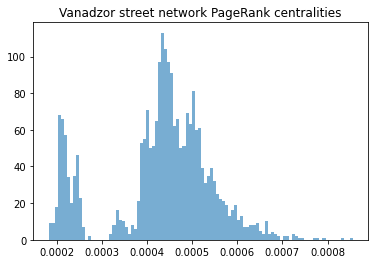

In [39]:
# let's plot a quick histogram of the centrality values
plt.hist(pr.values(), bins=100, alpha=0.6)
plt.title('Vanadzor street network PageRank centralities')
plt.show()

Let's plot the results for the node with the maximum PageRank centrality in Vanadzor:

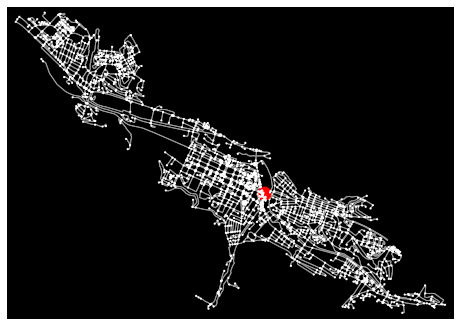

In [40]:
# below we create a list for specifying the node colors - the node with maximum centrality in red, the rest in white
# and, accordingly, a list for node sizes - the node with maximum centrality bigger than the rest
node_colors_pr = ["r" if node == max_node_pr else "w" for node in G_proj.nodes]
node_sizes_pr  = [200 if node == max_node_pr else 5 for node in G_proj.nodes]
fig, ax = ox.plot_graph(G_proj, node_size=node_sizes_pr, node_color=node_colors_pr, node_zorder=2, bgcolor="k")

Now, let's plot the PageRank centrality values for all street junctions in the Vanadzor street network:

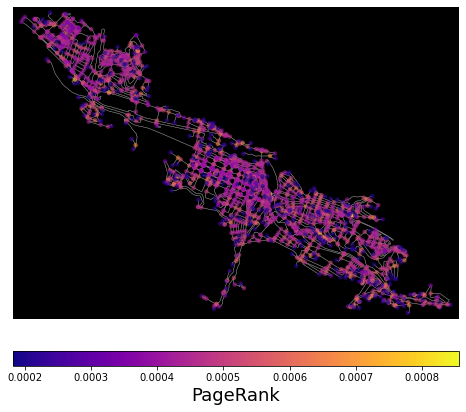

In [41]:
# add the PageRank centrality values as new node attributes, then plot
nx.set_node_attributes(G_proj, pr, "pr")

cmap = plt.cm.get_cmap('plasma')
pr_list = list(nx.get_node_attributes(G_proj, "pr").values())
norm=plt.Normalize(vmin=min(pr_list), vmax=max(pr_list))
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

node_colors_pr = ox.plot.get_node_colors_by_attr(G_proj, "pr", cmap="plasma")
fig, ax = ox.plot_graph(
    G_proj,
    node_color=node_colors_pr,
    node_size=20,
    node_zorder=2,
    edge_linewidth=0.4,
    edge_color="grey",
    bgcolor="k",
    node_alpha=.6,
    show = False
)
cbax = fig.add_axes([0.125, 0.15, 0.775, 0.025])
cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, cax=cbax, orientation="horizontal")
cb.set_label('PageRank', fontsize = 18)
plt.show()

### Isochrones

An isochrone map is a common analytic tool in geography, aptial analysis, and urban planning, and is a map that displays the area accessible from a given point within a certain time threshold.

In [42]:
# configure trip times and travel speed

trip_times = [5, 10, 15, 20, 25, 30, 35]  # in minutes
travel_speed = 4.5  # walking speed in km/hour

In [43]:
# find the geometric center of all street nodes in the network and get the nearest street node to it

gdf_nodes = ox.graph_to_gdfs(G, edges=False)
x, y = gdf_nodes["geometry"].unary_union.centroid.xy
center_node = ox.distance.nearest_nodes(G, x[0], y[0])

In [44]:
print(list(G_proj.edges(data=True, keys=True))[:10])

[(208864303, 1876621394, 0, {'osmid': 419830747, 'ref': 'Մ-8', 'name': 'Երեւանյան խճուղի', 'highway': 'trunk', 'maxspeed': '50', 'oneway': False, 'length': 46.95, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000022A8B513700>}), (208864303, 7424252319, 0, {'osmid': 419830747, 'ref': 'Մ-8', 'name': 'Երեւանյան խճուղի', 'highway': 'trunk', 'maxspeed': '50', 'oneway': False, 'length': 69.234, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000022A8B513670>}), (208864303, 5500309947, 0, {'osmid': 190112331, 'name': 'Ամիրյան փողոց', 'highway': 'residential', 'maxspeed': '60', 'oneway': False, 'length': 43.300000000000004, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000022A8B513F40>}), (1876621394, 1876621396, 0, {'osmid': 177209503, 'highway': 'residential', 'oneway': False, 'length': 99.037, 'geometry': <shapely.geometry.linestring.LineString object at 0x0000022A8CA83C40>}), (1876621394, 3772941078, 0, {'osmid': 419830747, 'ref': 'Մ-8

In [45]:
# add an edge attribute for time in minutes required to cross each edge at the specified travel speed
meters_per_minute = travel_speed * 1000 / 60  # km per hour to m per minute
for _, _, _, data in G_proj.edges(data=True, keys=True):
    data["time"] = data["length"] / meters_per_minute

### Plot street junctions you can reach walking within each time threshold

How far can you walk in 5, 10, 15, 20, and 25 minutes from a given origin node? We'll use the `networkx` package to extract a subgraph of our Vanadzor network for each distance corresponding to the travel times in our list.

In [46]:
# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="viridis", start=0, return_hex=True)
print(iso_colors)

['#440154', '#443983', '#31688e', '#21918c', '#35b779', '#90d743', '#fde725']


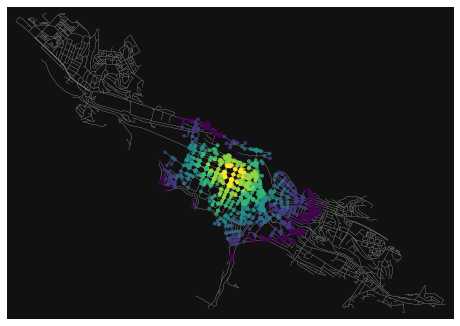

In [47]:
# color the street network nodes according to the isochrone and plot the street network
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G_proj, center_node, radius=trip_time, distance="time")
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else "none" for node in G_proj.nodes()]
ns = [15 if node in node_colors else 0 for node in G_proj.nodes()]
fig, ax = ox.plot_graph(
    G_proj,
    node_color=nc,
    node_size=ns,
    node_alpha=0.8,
    edge_linewidth=0.2,
    edge_color="#999999",
)

Let's change the visual representation tachnique, and plot the city street network on a light background on top of the city polygon.

Vanadzor coordinate reference system:  epsg:4326
Projected Vanadzor coordinate reference system:  +proj=utm +zone=38 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


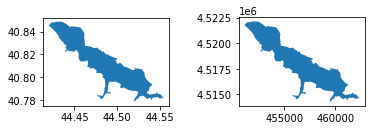

In [48]:
# load Vanadzor polygon from openstreetmap using osmmnx api

city_name = 'Vanadzor, Armenia'
city = ox.geocode_to_gdf(city_name)
print('Vanadzor coordinate reference system: ', city.crs)

# project to the local crs
city_proj = ox.projection.project_gdf(city)
print('Projected Vanadzor coordinate reference system: ', city_proj.crs)

fig, (ax1, ax2) = plt.subplots(1, 2)
city.plot(ax=ax1, ec='none')
city_proj.plot(ax=ax2, ec='none' )
plt.tight_layout(pad=3.0)
plt.show()

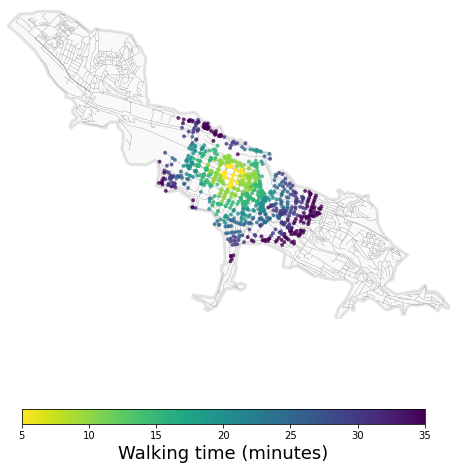

In [49]:
node_colors = {}

cmap = plt.cm.get_cmap('viridis_r')
norm=plt.Normalize(vmin=min(trip_times), vmax=max(trip_times))
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G_proj, center_node, radius=trip_time, distance="time")
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else "none" for node in G_proj.nodes()]
ns = [15 if node in node_colors else 0 for node in G_proj.nodes()]
fig, ax = ox.plot_graph(
    G_proj,
    node_color=nc,
    node_size=ns,
    node_alpha=0.8,
    edge_linewidth=0.2,
    bgcolor="w",
    edge_color="#999999",
    show=False,
    close=False
)
plt.close()
# to this matplotlib axis, add the place shape as descartes polygon patches
for geometry in city_proj['geometry'].tolist():
    if isinstance(geometry, (Polygon, MultiPolygon)):
        if isinstance(geometry, Polygon):
            geometry = MultiPolygon([geometry])
        for polygon in geometry:
            patch = PolygonPatch(polygon, fc='#cccccc', ec='k', linewidth=3, alpha=0.1, zorder=-1)
            ax.add_patch(patch)
            
cbax = fig.add_axes([0.15, 0.05, 0.7, 0.025])
cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, cax=cbax, orientation="horizontal")
cb.set_label('Walking time (minutes)', fontsize = 18)
fig

### Plot building footprints

In [50]:
# get all the building footprints in Vanadzor
gdf_buildings = ox.geometries_from_place("Vanadzor, Armenia", {"building": True})
gdf_buildings.shape

(6291, 57)

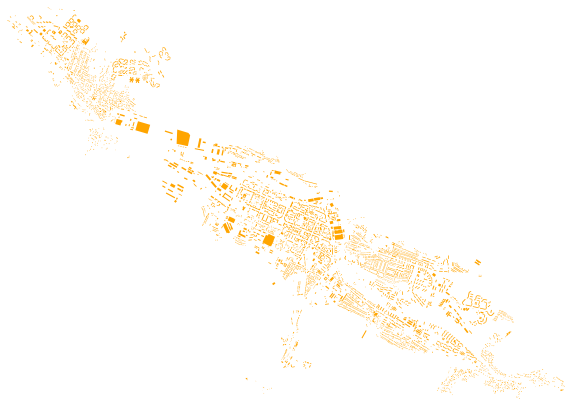

(<Figure size 720x1440 with 1 Axes>, <AxesSubplot:>)

In [51]:
# plot building footprints

fig, ax = plt.subplots(figsize=(10,20))

ox.plot_footprints(gdf_buildings, ax=ax)

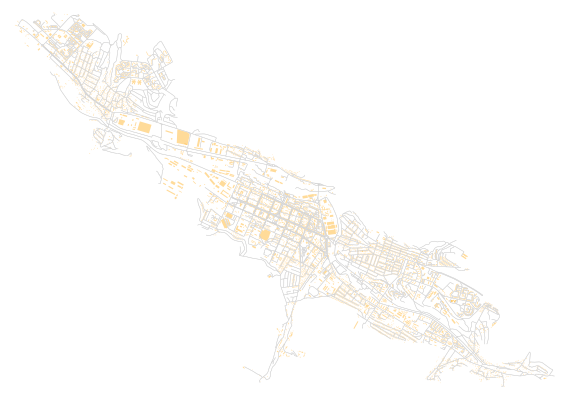

(<Figure size 720x1440 with 1 Axes>, <AxesSubplot:>)

In [52]:
# let's plot street network and the entities' footprints together

fig, ax = plt.subplots(figsize=(10,20))

ox.plot_footprints(gdf_buildings, alpha=0.4, show=False, ax=ax)
ox.plot_graph(G, ax=ax, node_size=0.1, edge_color="lightgray", edge_linewidth=0.4)

### Homework assignments

1. Compute and plot the longest and second longest shortest paths in the Gyumri street network together on the same plot.
    
2. Plot an isochrone with walking distances of up to 90 minutes from the grid cell (choose a resolution yourself) with most vehicle GPS points at 18:00-19:00 o'clock in Rome.

Complete both assignments in a clean Jupyter Notebook, name the notebook **< Name > < Surname > Class 5 Homework** and upload it to Moodle.